In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=954b7b121146f307cf7a377dd700d7ec9157aeedf105021c1e5a950f4d693351
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
company_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/content/drive/MyDrive/Colab Notebooks/Fortune 500 2017 - Fortune 500.csv')
company_df.take(1)

[Row(Rank=1, Title='Walmart', Website='http://www.walmart.com', Employees=2300000, Sector='Retailing', Industry='General Merchandisers', Hqlocation='Bentonville, AR', Hqaddr='702 S.W. Eighth St.', Hqcity='Bentonville', Hqstate='AR', Hqzip=72716, Hqtel='479-273-4000', Ceo='C. Douglas McMillon', Ceo-title='President, Chief Executive Officer & Director', Address='702 S.W. Eighth St., Bentonville, AR 72716', Ticker='WMT', Fullname='Wal-Mart Stores, Inc.', Revenues='485873', Revchange=0.8, Profits=13643.0, Prftchange='-7.2', Assets=198825.0, Totshequity=77798.0)]

In [5]:
company_df.cache()
company_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Website: string (nullable = true)
 |-- Employees: integer (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Hqlocation: string (nullable = true)
 |-- Hqaddr: string (nullable = true)
 |-- Hqcity: string (nullable = true)
 |-- Hqstate: string (nullable = true)
 |-- Hqzip: integer (nullable = true)
 |-- Hqtel: string (nullable = true)
 |-- Ceo: string (nullable = true)
 |-- Ceo-title: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Ticker: string (nullable = true)
 |-- Fullname: string (nullable = true)
 |-- Revenues: string (nullable = true)
 |-- Revchange: double (nullable = true)
 |-- Profits: double (nullable = true)
 |-- Prftchange: string (nullable = true)
 |-- Assets: double (nullable = true)
 |-- Totshequity: double (nullable = true)



In [6]:
company_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rank,500,250.492,144.47736623675496,1,500
Title,500,None,None,3M,salesforce.com
Website,500,None,None,http://ir.yumchina.com,http://www.zimmerbiomet.com
Employees,500,56350.132,123452.02592111082,83,2300000
Sector,500,None,None,Aerospace & Defense,Wholesalers
Industry,500,None,None,"Advertising, Marketing",Wholesalers: Health Care
Hqlocation,500,None,None,"Abbott Park, IL","Woonsocket, RI"
Hqaddr,500,None,None,1 ADP Blvd.,N56 W17000 Ridgewood Dr.
Hqcity,500,None,None,Abbott Park,Woonsocket


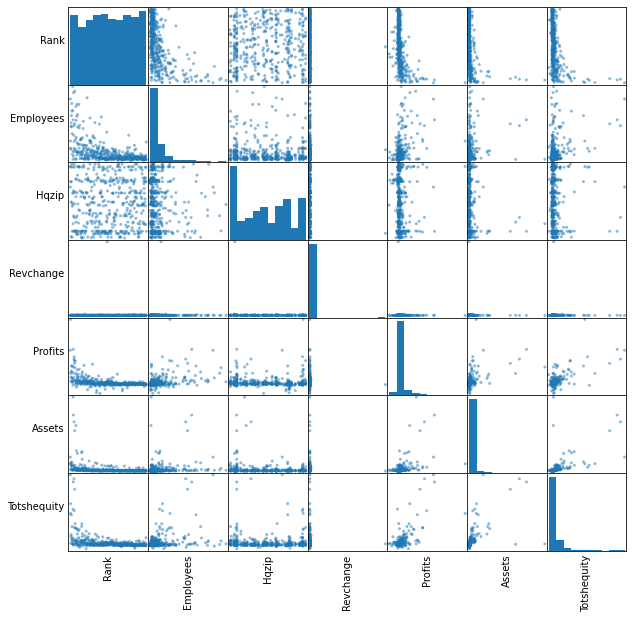

In [10]:
import pandas as pd
numeric_features = [t[0] for t in company_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = company_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
  v = axs[i, 0]
  v.yaxis.label.set_rotation(0)
  v.yaxis.label.set_ha('right')
  v.set_yticks(())
  h = axs[n-1, i]
  h.xaxis.label.set_rotation(90)
  h.set_xticks(())

In [12]:
import six
for i in company_df.columns:
  if not( isinstance(company_df.select(i).take(1)[0][0], six.string_types)):
    print( "Correlation to Employees for ", i, company_df.stat.corr('Employees',i))

Correlation to Employees for  Rank -0.352639589494228
Correlation to Employees for  Employees 1.0
Correlation to Employees for  Hqzip 0.014256984305479687
Correlation to Employees for  Revchange 0.0037009154920266316
Correlation to Employees for  Profits 0.3426032482000915
Correlation to Employees for  Assets 0.12690120378798117
Correlation to Employees for  Totshequity 0.27529956126837296


In [13]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Rank', 'Employees'], outputCol = 'features')
tcompany_df = vectorAssembler.transform(company_df)
tcompany_df = tcompany_df.select(['features', 'Employees'])
tcompany_df.show(3)

+---------------+---------+
|       features|Employees|
+---------------+---------+
|[1.0,2300000.0]|  2300000|
| [2.0,367700.0]|   367700|
| [3.0,116000.0]|   116000|
+---------------+---------+
only showing top 3 rows



In [14]:
splits = tcompany_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [16]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Employees', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.9999977814019795]
Intercept: 0.1322792747389812
